<a href="https://colab.research.google.com/github/Sudipta-Mitra/face-recognition-/blob/main/face_recognirion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FACE RECOGNITION**

In [ ]:
import tensorflow
from tensorflow import keras
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_images = "/content/gdrive/MyDrive/Face Images/Final Training Images"

from tensorflow.keras.preprocessing.image import ImageDataGenerator # create many variations of an image.
train_gen = ImageDataGenerator(
    shear_range=0.1, #tilting
    zoom_range=0.1,
    horizontal_flip=True
)

In [ ]:
test_gen = ImageDataGenerator()

In [ ]:
training_data = train_gen.flow_from_directory(
    train_images,
    target_size = (100,100),
    batch_size = 30,
    class_mode = 'categorical'
)

Found 244 images belonging to 16 classes.


In [ ]:
testing_data = test_gen.flow_from_directory(
    train_images,
    target_size = (100,100),
    batch_size = 30,
    class_mode = 'categorical'
)

Found 244 images belonging to 16 classes.


In [ ]:
testing_data.class_indices

{'face1': 0,
 'face10': 1,
 'face11': 2,
 'face12': 3,
 'face13': 4,
 'face14': 5,
 'face15': 6,
 'face16': 7,
 'face2': 8,
 'face3': 9,
 'face4': 10,
 'face5': 11,
 'face6': 12,
 'face7': 13,
 'face8': 14,
 'face9': 15}

In [ ]:
Train_class = training_data.class_indices
Result_class = {}
for value_tag, face_tag in zip(Train_class.values(),Train_class.keys()):
    Result_class[value_tag] = face_tag
import pickle
with open('/content/gdrive/MyDrive/Face Images/ResultMap.pkl','wb') as Final_mapping:
    pickle.dump(Result_class,Final_mapping)

In [ ]:
print("Mapping of Face and its numeric value",Result_class)

Mapping of Face and its numeric value {0: 'face1', 1: 'face10', 2: 'face11', 3: 'face12', 4: 'face13', 5: 'face14', 6: 'face15', 7: 'face16', 8: 'face2', 9: 'face3', 10: 'face4', 11: 'face5', 12: 'face6', 13: 'face7', 14: 'face8', 15: 'face9'}


In [ ]:
Output_Neurons=len(Result_class)
print('\n The Number of output neurons: ', Output_Neurons)


 The Number of output neurons:  16


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [ ]:
Model = Sequential()
Model.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), input_shape = (100,100,3),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
Model.add(Conv2D(32,kernel_size=(3,3),strides=(1,1),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
Model.add(Flatten())
Model.add(Dense(64,activation='relu'))
Model.add(Dense(Output_Neurons,activation='softmax'))
Model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['Accuracy'])
from keras.callbacks import EarlyStopping
call = EarlyStopping(
                    min_delta=0.005,
                    patience=5,
                     verbose=1
                    )
import time
StartTime=time.time()
Model.fit(training_data,
          epochs = 30,
          validation_data=testing_data,
                   callbacks=call)

Endtime = time.time()
print('Total Training Time taken: ',round((Endtime-StartTime)/60),'Minutes')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 99s 11s/step - Accuracy: 0.0752 - loss: 216.1414 - val_Accuracy: 0.0492 - val_loss: 28.7980
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 592ms/step - Accuracy: 0.1412 - loss: 14.2898 - val_Accuracy: 0.2336 - val_loss: 2.5020
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 545ms/step - Accuracy: 0.3123 - loss: 2.2585 - val_Accuracy: 0.5820 - val_loss: 1.3901
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 783ms/step - Accuracy: 0.6055 - loss: 1.4330 - val_Accuracy: 0.6066 - val_loss: 1.3398
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 533ms/step - Accuracy: 0.6497 - loss: 1.1624 - val_Accuracy: 0.8361 - val_loss: 0.5389
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 571ms/step - Accuracy: 0.7832 - loss: 0.6659 - val_Accuracy: 0.9426 - val_loss: 0.2066
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - Accuracy: 0.8950 - loss: 0.2659 - val_Accuracy: 0.9713 - val_loss: 0.1242
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - Accuracy: 0.9151 - loss: 0.2175 - val_Accuracy: 0.9836 - val_loss: 0

In [ ]:
import numpy as np
from keras.preprocessing import image
import os
import glob
test_images_path = "/content/gdrive/MyDrive/Face Images/Final Testing Images"
with open('/content/gdrive/MyDrive/Face Images/ResultMap.pkl', 'rb') as Final_mapping:
   Result_class = pickle.load(Final_mapping)
ImagePath="/content/gdrive/MyDrive/Face Images/Final Testing Images/face10/1face10.jpg"
test_image=image.load_img(ImagePath,target_size=(100, 100))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=Model.predict(test_image,verbose=0)
print('Prediction is: ',Result_class[np.argmax(result)])

Prediction is:  face10


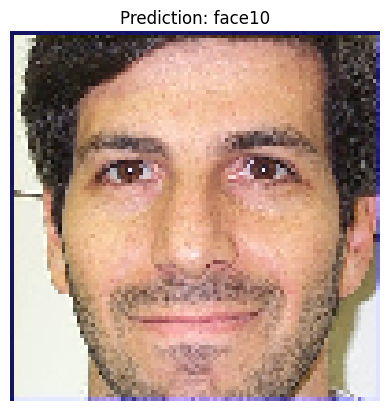

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
with open('/content/gdrive/MyDrive/Face Images/ResultMap.pkl', 'rb') as Final_mapping:
    Result_class = pickle.load(Final_mapping)
ImagePath = "/content/gdrive/MyDrive/Face Images/Final Testing Images/face10/1face10.jpg"
test_image = image.load_img(ImagePath, target_size=(100, 100))
test_image_array = image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)
result = Model.predict(test_image_array, verbose=0)
predicted_label = Result_class[np.argmax(result)]
plt.imshow(test_image)
plt.title(f"Prediction: {predicted_label}")
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
from keras.preprocessing import image
import os
import glob
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
test_images_path = "/content/gdrive/MyDrive/Face Images/Final Testing Images"
with open('/content/gdrive/MyDrive/Face Images/ResultMap.pkl', 'rb') as Final_mapping:
    Result_class = pickle.load(Final_mapping)
y_true = []
y_pred = []
main_ = "/content/gdrive/MyDrive/Face Images/Final Testing Images"
img_paths = glob.glob(os.path.join(main_, '**', '*.jpg'))
print(f"Found {len(img_paths)} images for evaluation.")

for path in img_paths:
    true_label = os.path.basename(os.path.dirname(path))
    y_true.append(true_label)

    test_image = image.load_img(path, target_size=(100, 100))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)

    result = Model.predict(test_image, verbose=0)
    predicted_label = Result_class[np.argmax(result)]
    y_pred.append(predicted_label)
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")
precision = precision_score(y_true, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")
recall = recall_score(y_true, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"F1-score: {f1:.4f}")
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Found 64 images for evaluation.
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
Confusion Matrix:
[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]]


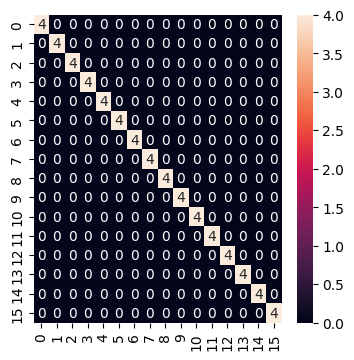

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True)
plt.show()